In [1]:
import scipy.io
file_path="houston_data.mat"
mat = scipy.io.whosmat(file_path)
print(mat)


[('hsi', (349, 1905, 144), 'uint16'), ('lidar', (349, 1905), 'single'), ('test', (349, 1905), 'uint8'), ('train', (349, 1905), 'uint8')]


In [2]:
import scipy.io


# Load the .mat file using scipy
mat_data = scipy.io.loadmat(file_path)

# Print available keys in the dataset
print(mat_data.keys())

# Access data
hsi_data = mat_data['hsi']     # Shape: (349, 1905, 144)
lidar_data = mat_data['lidar'] # Shape: (349, 1905)
test_data = mat_data['test']   # Shape: (349, 1905)
train_data = mat_data['train'] # Shape: (349, 1905)


dict_keys(['__header__', '__version__', '__globals__', 'hsi', 'lidar', 'test', 'train'])


In [4]:
import numpy as np
print(np.unique(test_data))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


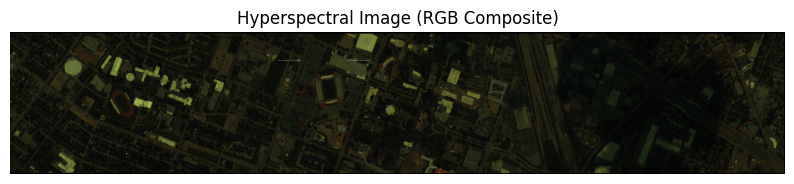

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the dataset
# mat_data = scipy.io.loadmat(file_path)

# Extract Hyperspectral Data (H, W, Bands) -> (349, 1905, 144)
hsi_data = mat_data['hsi']

# Normalize and Select Bands (R=60, G=30, B=10)
rgb_image = np.stack([
    hsi_data[:, :, 60],  # Red
    hsi_data[:, :, 30],  # Green
    hsi_data[:, :, 10]   # Blue
], axis=-1)

# Normalize between 0 and 1
rgb_image = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(rgb_image)
plt.title("Hyperspectral Image (RGB Composite)")
plt.axis("off")
plt.show()


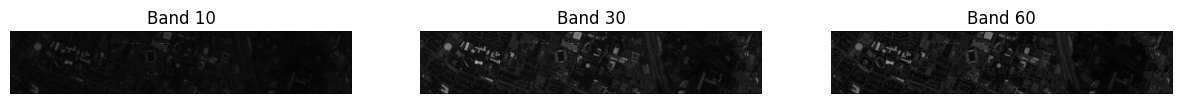

In [7]:
plt.figure(figsize=(15, 5))
for i, band in enumerate([10, 30, 60]):  # Choose 3 bands
    plt.subplot(1, 3, i + 1)
    plt.imshow(hsi_data[:, :, band], cmap='gray')
    plt.title(f"Band {band}")
    plt.axis("off")

plt.show()


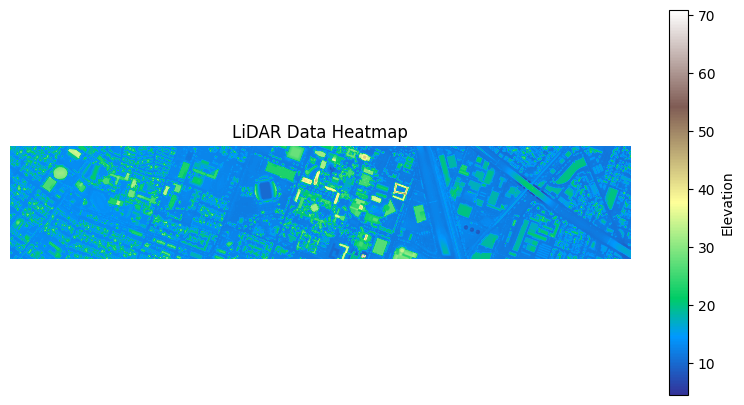

In [8]:
lidar_data = mat_data['lidar']

plt.figure(figsize=(10, 5))
plt.imshow(lidar_data, cmap='terrain')
plt.colorbar(label="Elevation")
plt.title("LiDAR Data Heatmap")
plt.axis("off")
plt.show()


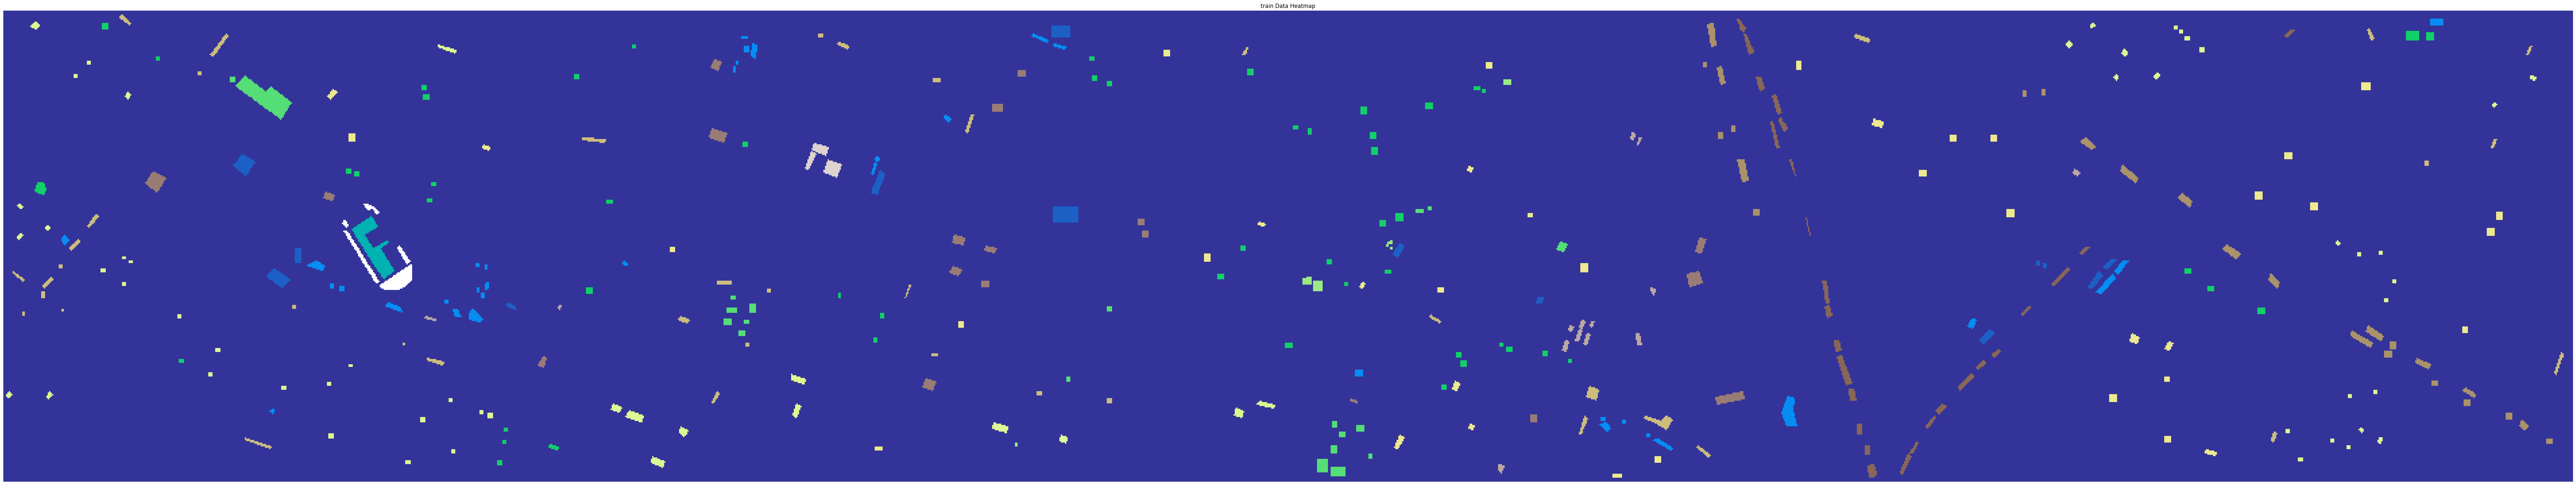

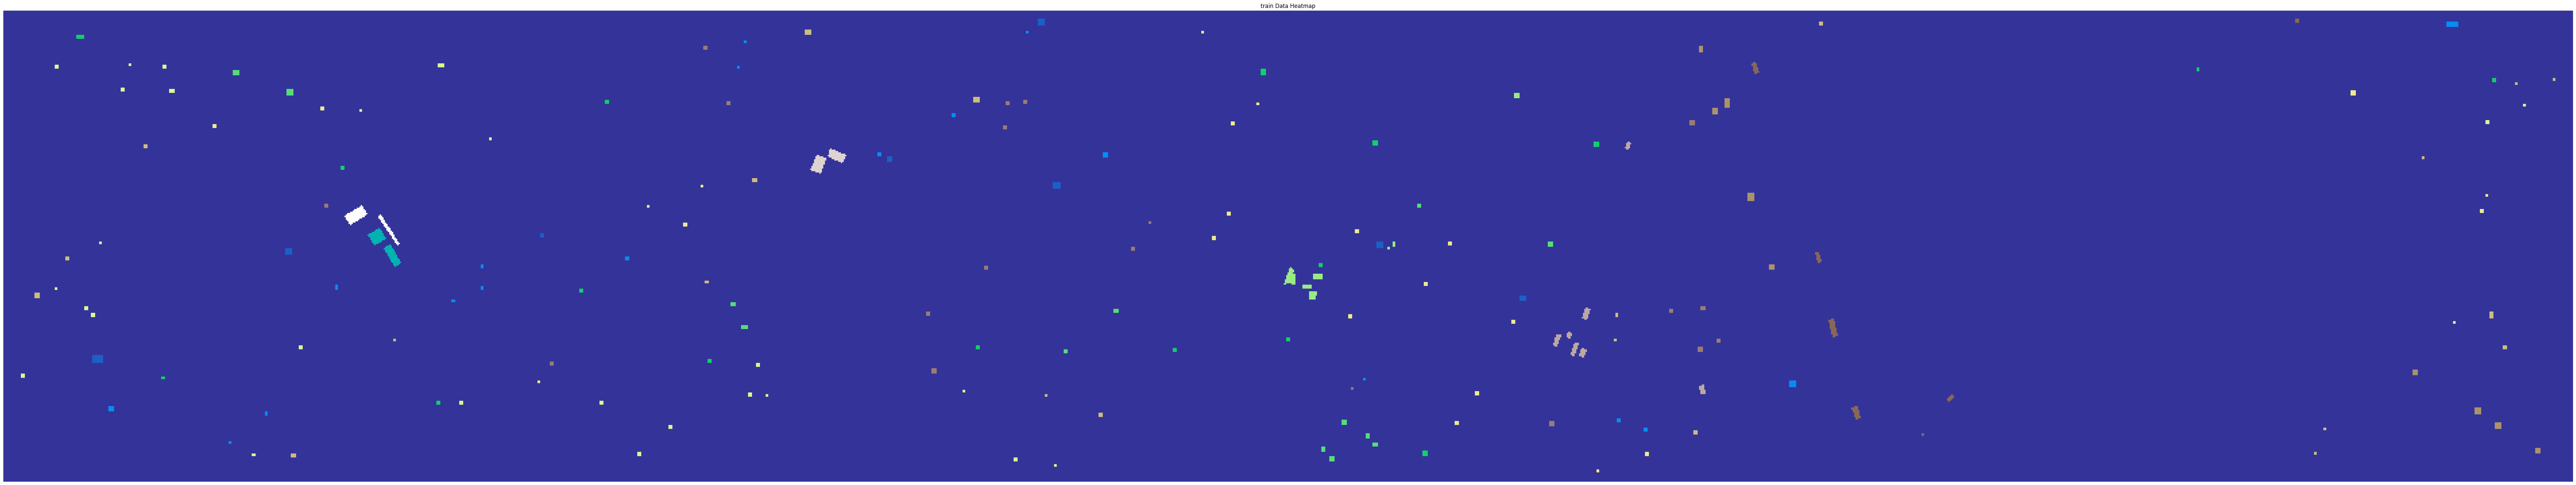

In [20]:
test_data = mat_data['test']

plt.figure(figsize=(100, 50))
plt.imshow(test_data, cmap='terrain')
# plt.colorbar(label="Elevation")
plt.title("train Data Heatmap")
plt.axis("off")
plt.show()

train_data = mat_data['train']

plt.figure(figsize=(100, 50))
plt.imshow(train_data, cmap='terrain')
# plt.colorbar(label="Elevation")
plt.title("train Data Heatmap")
plt.axis("off")
plt.show()


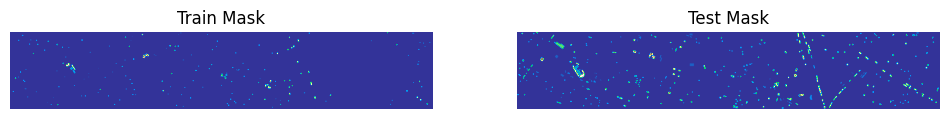

In [19]:
train_mask = mat_data['train']
test_mask = mat_data['test']

plt.figure(figsize=(12, 5))

# Train Mask
plt.subplot(1, 2, 1)
plt.imshow(train_mask, cmap='terrain')
plt.title("Train Mask")
plt.axis("off")

# Test Mask
plt.subplot(1, 2, 2)
plt.imshow(test_mask, cmap='terrain')
plt.title("Test Mask")
plt.axis("off")

plt.show()


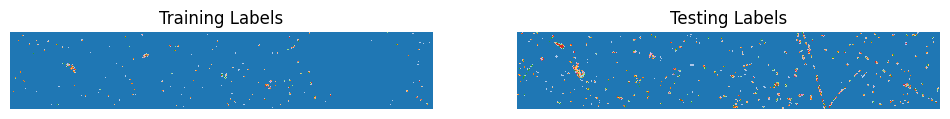

In [13]:
plt.figure(figsize=(12, 5))

# Training Mask
plt.subplot(1, 2, 1)
plt.imshow(train_mask, cmap='tab20')
plt.title("Training Labels")
plt.axis("off")

# Testing Mask
plt.subplot(1, 2, 2)
plt.imshow(test_mask, cmap='tab20')
plt.title("Testing Labels")
plt.axis("off")

plt.show()
